In [79]:
import imp 
import tree_functions as tree
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time
import shelve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [464]:
figures_file = 'figures/' 
figures_param = '_n600_z6_.png'

In [465]:
ratios = [[[0.15, 0.4], 0.4265426710990767],
 [[0.15, 0.45], 0.4737495646913922],
 [[0.15, 0.5], 0.5214773562528404],
 [[0.15, 0.55], 0.5695947821955025],
 [[0.15, 0.6], 0.6180076936721534],
 [[0.15, 0.65], 0.6666356130833248],
 [[0.15, 0.7], 0.7153820653055578],
 [[0.15, 0.75], 0.7641016411484136],
 [[0.15, 0.8], 0.8125776934168755],
 [[0.15, 0.85], 0.8605229026101294],
 [[0.15, 0.9], 0.907602943423931],
 [[0.15, 0.95], 0.9534728409233615],
 [[0.15, 1.0], 0.9978130649981629],
 [[0.15, 1.05], 1.0403563819377821],
 [[0.15, 1.1], 1.0809022729646915],
 [[0.15, 1.15], 1.1193200861928592],
 [[0.15, 1.2], 1.1555441335544419],
 [[0.15, 1.25], 1.1895642045893604],
 [[0.15, 1.3], 1.2214143075369155],
 [[0.15, 1.35], 1.251161527420048],
 [[0.15, 1.4], 1.2788960657476491],
 [[0.2, 0.4], 0.4460621887714843],
 [[0.2, 0.45], 0.49139747255002786],
 [[0.2, 0.5], 0.5375606561753975],
 [[0.2, 0.55], 0.5843552360402143],
 [[0.2, 0.6], 0.6316378198154744],
 [[0.2, 0.65], 0.6792907084704258],
 [[0.2, 0.7], 0.7271893325290998],
 [[0.2, 0.75], 0.7751671716403968],
 [[0.2, 0.8], 0.8229916972983159],
 [[0.2, 0.85], 0.8703634251850395],
 [[0.2, 0.9], 0.9169383451983318],
 [[0.2, 0.95], 0.9623633847781916],
 [[0.2, 1.0], 1.006311948982173],
 [[0.2, 1.05], 1.0485104803586582],
 [[0.2, 1.1], 1.0887527495641562],
 [[0.2, 1.15], 1.1269029600360714],
 [[0.2, 1.2], 1.162890824873666],
 [[0.2, 1.25], 1.196702061009168],
 [[0.2, 1.3], 1.2283671017408262],
 [[0.2, 1.35], 1.2579499169996164],
 [[0.2, 1.4], 1.2855380091495103],
 [[0.25, 0.4], 0.4699760354148123],
 [[0.25, 0.45], 0.5132031504591265],
 [[0.25, 0.5], 0.5575638588362244],
 [[0.25, 0.55], 0.602807630592241],
 [[0.25, 0.6], 0.6487467402876592],
 [[0.25, 0.65], 0.6952279225023048],
 [[0.25, 0.7], 0.7420985938247926],
 [[0.25, 0.75], 0.7891705402519719],
 [[0.25, 0.8], 0.8361945535786385],
 [[0.25, 0.85], 0.8828581366858723],
 [[0.25, 0.9], 0.928806721825199],
 [[0.25, 0.95], 0.9736782230153637],
 [[0.25, 1.0], 1.0171380124038814],
 [[0.25, 1.05], 1.0589052011556845],
 [[0.25, 1.1], 1.0987668302675175],
 [[0.25, 1.15], 1.1365809601390815],
 [[0.25, 1.2], 1.1722717552632473],
 [[0.25, 1.25], 1.2058199784529238],
 [[0.25, 1.3], 1.2372516858957079],
 [[0.25, 1.35], 1.2666270134858009],
 [[0.25, 1.4], 1.2940301273852564],
 [[0.3, 0.4], 0.4976553046073075],
 [[0.3, 0.45], 0.5386657609137042],
 [[0.3, 0.5], 0.5810858671658664],
 [[0.3, 0.55], 0.6246281836739356],
 [[0.3, 0.6], 0.6690707446701208],
 [[0.3, 0.65], 0.7142304898045416],
 [[0.3, 0.7], 0.7599300305266935],
 [[0.3, 0.75], 0.8059612087074395],
 [[0.3, 0.8], 0.8520590705896774],
 [[0.3, 0.85], 0.8978985565485763],
 [[0.3, 0.9], 0.943114656257255],
 [[0.3, 0.95], 0.9873361182059128],
 [[0.3, 1.0], 1.0302199108037478],
 [[0.3, 1.05], 1.0714772761818736],
 [[0.3, 1.1], 1.1108878771665902],
 [[0.3, 1.15], 1.148302924880994],
 [[0.3, 1.2], 1.1836403155213757],
 [[0.3, 1.25], 1.216875157432255],
 [[0.3, 1.3], 1.2480284702647366],
 [[0.3, 1.35], 1.2771559496128584],
 [[0.3, 1.4], 1.3043378775916425],
 [[0.35, 0.4], 0.5284954869905325],
 [[0.35, 0.45], 0.5672807766409043],
 [[0.35, 0.5], 0.6077067241568718],
 [[0.35, 0.55], 0.6494667392602694],
 [[0.35, 0.6], 0.6923166464407726],
 [[0.35, 0.65], 0.7360515404046137],
 [[0.35, 0.7], 0.7804744255014828],
 [[0.35, 0.75], 0.8253606166438553],
 [[0.35, 0.8], 0.8704316959645462],
 [[0.35, 0.85], 0.9153515692986961],
 [[0.35, 0.9], 0.9597457644672407],
 [[0.35, 0.95], 1.0032344132252882],
 [[0.35, 1.0], 1.0454662797919647],
 [[0.35, 1.05], 1.0861446639097831],
 [[0.35, 1.1], 1.1250415784322212],
 [[0.35, 1.15], 1.1620009831561298],
 [[0.35, 1.2], 1.196934030802497],
 [[0.35, 1.25], 1.2298096707789163],
 [[0.35, 1.3], 1.2606433834185258],
 [[0.35, 1.35], 1.2894859430009675],
 [[0.35, 1.4], 1.3164133000261868],
 [[0.4, 0.4], 0.5619739859900946],
 [[0.4, 0.45], 0.5985939865272147],
 [[0.4, 0.5], 0.6370359045969946],
 [[0.4, 0.55], 0.6769891628125237],
 [[0.4, 0.6], 0.71819887224865],
 [[0.4, 0.65], 0.7604466787962456],
 [[0.4, 0.7], 0.8035220034461433],
 [[0.4, 0.75], 0.8471879535657711],
 [[0.4, 0.8], 0.8911557767865004],
 [[0.4, 0.85], 0.9350806257097946],
 [[0.4, 0.9], 0.9785802029333334],
 [[0.4, 0.95], 1.0212671389209227],
 [[0.4, 1.0], 1.0627826792633979],
 [[0.4, 1.05], 1.1028225206713593],
 [[0.4, 1.1], 1.14115110058287],
 [[0.4, 1.15], 1.1776050127339175],
 [[0.4, 1.2], 1.212088427159234],
 [[0.4, 1.25], 1.2445638221889546],
 [[0.4, 1.3], 1.2750407920208424],
 [[0.4, 1.35], 1.3035648347348625],
 [[0.4, 1.4], 1.3302072235731066],
 [[0.45, 0.4], 0.5976654384972876],
 [[0.45, 0.45], 0.6322214613180291],
 [[0.45, 0.5], 0.6687331001156377],
 [[0.45, 0.55], 0.7068971226495075],
 [[0.45, 0.6], 0.7464575242729478],
 [[0.45, 0.65], 0.7871901719001831],
 [[0.45, 0.7], 0.8288768457778668],
 [[0.45, 0.75], 0.8712730020519575],
 [[0.45, 0.8], 0.9140830563616672],
 [[0.45, 0.85], 0.9569561076593931],
 [[0.45, 0.9], 0.9995040915130753],
 [[0.45, 0.95], 1.041333656602592],
 [[0.45, 1.0], 1.0820795897785234],
 [[0.45, 1.05], 1.121430660939761],
 [[0.45, 1.1], 1.1591441021133557],
 [[0.45, 1.15], 1.1950492797415044],
 [[0.45, 1.2], 1.2290433556741787],
 [[0.45, 1.25], 1.2610822028095223],
 [[0.45, 1.3], 1.2911693289098392],
 [[0.45, 1.35], 1.3193447213681062],
 [[0.45, 1.4], 1.3456747278189605],
 [[0.5, 0.4], 0.6351657776166657],
 [[0.5, 0.45], 0.6677840705140633],
 [[0.5, 0.5], 0.7024496763978891],
 [[0.5, 0.55], 0.7388742319849774],
 [[0.5, 0.6], 0.7768078425357337],
 [[0.5, 0.65], 0.8160269330224504],
 [[0.5, 0.7], 0.8563109331007588],
 [[0.5, 0.75], 0.8974119638119108],
 [[0.5, 0.8], 0.9390311084440918],
 [[0.5, 0.85], 0.9808142437299777],
 [[0.5, 0.9], 1.0223698047667635],
 [[0.5, 0.95], 1.063300227200912],
 [[0.5, 1.0], 1.103235164173114],
 [[0.5, 1.05], 1.141857397500108],
 [[0.5, 1.1], 1.178917570692407],
 [[0.5, 1.15], 1.2142381850946034],
 [[0.5, 1.2], 1.2477095653152341],
 [[0.5, 1.25], 1.2792810135491615],
 [[0.5, 1.3], 1.308949894168195],
 [[0.5, 1.35], 1.3367505685366718],
 [[0.5, 1.4], 1.362744312691071],
 [[0.55, 0.4], 0.6742197494594356],
 [[0.55, 0.45], 0.7050335242654014],
 [[0.55, 0.5], 0.7379513895760763],
 [[0.55, 0.55], 0.7727042359125204],
 [[0.55, 0.6], 0.8090532304680473],
 [[0.55, 0.65], 0.8467801727271314],
 [[0.55, 0.7], 0.8856664833071491],
 [[0.55, 0.75], 0.9254647147776673],
 [[0.55, 0.8], 0.9658758347383475],
 [[0.55, 0.85], 1.0065452231317624],
 [[0.55, 0.9], 1.0470800939778164],
 [[0.55, 0.95], 1.0870805299844506],
 [[0.55, 1.0], 1.1261725147480008],
 [[0.55, 1.05], 1.1640339435478162],
 [[0.55, 1.1], 1.2004096567393343],
 [[0.55, 1.15], 1.235115814669861],
 [[0.55, 1.2], 1.2680362238062823],
 [[0.55, 1.25], 1.2991137814422309],
 [[0.55, 1.3], 1.3283397648751947],
 [[0.55, 1.35], 1.355742891550192],
 [[0.55, 1.4], 1.3813792988450437],
 [[0.6, 0.4], 0.7145300647810485],
 [[0.6, 0.45], 0.743675475764098],
 [[0.6, 0.5], 0.7749536736425767],
 [[0.6, 0.55], 0.808116810313964],
 [[0.6, 0.6], 0.8429401358611691],
 [[0.6, 0.65], 0.8792141967908927],
 [[0.6, 0.7], 0.9167257291952261],
 [[0.6, 0.75], 0.9552307999710717],
 [[0.6, 0.8], 0.994433040001369],
 [[0.6, 0.85], 1.0339798011200394],
 [[0.6, 0.9], 1.0734792341351824],
 [[0.6, 0.95], 1.1125309081486852],
 [[0.6, 1.0], 1.1507586523197224],
 [[0.6, 1.05], 1.1878366742302342],
 [[0.6, 1.1], 1.2235049190370706],
 [[0.6, 1.15], 1.2575738620703196],
 [[0.6, 1.2], 1.2899212409289809],
 [[0.6, 1.25], 1.3204838355875448],
 [[0.6, 1.3], 1.3492470025401413],
 [[0.6, 1.35], 1.3762338939670629],
 [[0.6, 1.4], 1.4014955262834363],
 [[0.65, 0.4], 0.7559213898043521],
 [[0.65, 0.45], 0.7835286512570497],
 [[0.65, 0.5], 0.813275556241461],
 [[0.65, 0.55], 0.8449359225407282],
 [[0.65, 0.6], 0.8783006357354987],
 [[0.65, 0.65], 0.9131711438314235],
 [[0.65, 0.7], 0.9493418755412905],
 [[0.65, 0.75], 0.9865747895122337],
 [[0.65, 0.8], 1.0245784524057195],
 [[0.65, 0.85], 1.0630043100627438],
 [[0.65, 0.9], 1.101463390316351],
 [[0.65, 0.95], 1.1395564732271388],
 [[0.65, 1.0], 1.176906712520765],
 [[0.65, 1.05], 1.2131858467415775],
 [[0.65, 1.1], 1.2481298894729045],
 [[0.65, 1.15], 1.2815443623418568],
 [[0.65, 1.2], 1.3133014664910325],
 [[0.65, 1.25], 1.3433322352030879],
 [[0.65, 1.3], 1.371616348674545],
 [[0.65, 1.35], 1.398171543477937],
 [[0.65, 1.4], 1.4230437956297133]]

In [431]:
rrange = list()
r_srange = list()
sdrange = list()
erange = list()

for i in range(len(ratios)):
    rrange.append(ratios[i][0][0])
    r_srange.append(ratios[i][0][1])
    sdrange.append(ratios[i][1])

In [432]:
erange = [abs((sd / 0.9867584620423371) - 1) for sd in sdrange]

In [437]:
X_r = np.arange(0.15, 0.65, 0.05)
Y_r_s = np.arange(0.4, 1.45, 0.05)
X_r, Y_r_s = np.meshgrid(X_r, Y_r_s)

Z_sd = np.array(sdrange)
Z_sd = Z_sd.reshape((21,11))

Z_e = np.array(erange)
Z_e = Z_e.reshape((21,11))

In [438]:
len(Y_r_s)

21

### Limited  plot

(array([ 9., 12.,  8., 11.,  8., 11., 10., 10., 10., 13.,  9., 11., 12.,
        13., 11., 11.,  9., 10.,  8.,  7.,  7.,  3.,  6.,  2.,  3.,  1.,
         2.,  2.,  1.,  1.]),
 array([1.86137274e-04, 1.91043812e-02, 3.80226251e-02, 5.69408691e-02,
        7.58591130e-02, 9.47773569e-02, 1.13695601e-01, 1.32613845e-01,
        1.51532089e-01, 1.70450333e-01, 1.89368577e-01, 2.08286820e-01,
        2.27205064e-01, 2.46123308e-01, 2.65041552e-01, 2.83959796e-01,
        3.02878040e-01, 3.21796284e-01, 3.40714528e-01, 3.59632772e-01,
        3.78551016e-01, 3.97469260e-01, 4.16387504e-01, 4.35305748e-01,
        4.54223991e-01, 4.73142235e-01, 4.92060479e-01, 5.10978723e-01,
        5.29896967e-01, 5.48815211e-01, 5.67733455e-01]),
 <a list of 30 Patch objects>)

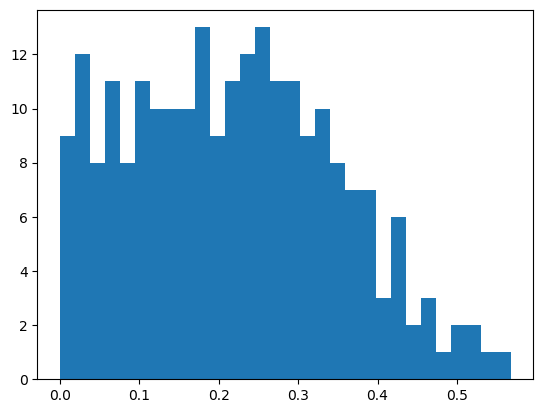

In [468]:
plt.hist(erange, bins=30)

In [469]:
thres = 0.35
lim_rrange = list()
lim_r_srange = list()
lim_erange = list()
not_counted = 0
for i, e in enumerate(erange):
    if e < thres:
        lim_rrange.append(rrange[i])
        lim_r_srange.append(r_srange[i])
        lim_erange.append(erange[i])
    else:
        not_counted += 1
print(not_counted / len(erange))

0.16883116883116883


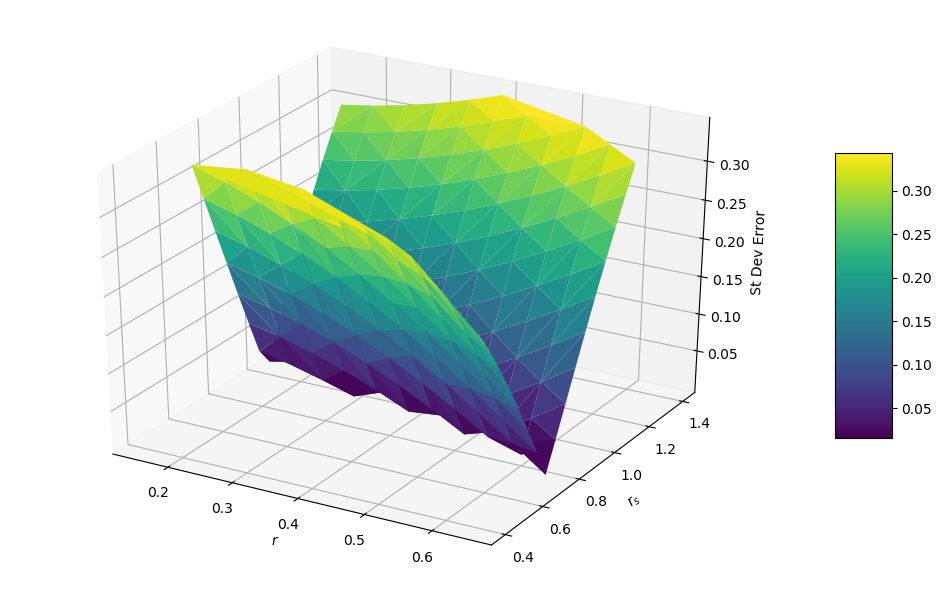

In [470]:
# Make the plot
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(lim_rrange, lim_r_srange, lim_erange, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('$r$')
ax.set_ylabel('$r_s$')
ax.set_zlabel('St Dev Error')

# ax.view_init(20, -130)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.savefig(figures_file + 'parameters_side' + figures_param, dpi=300)
plt.show()

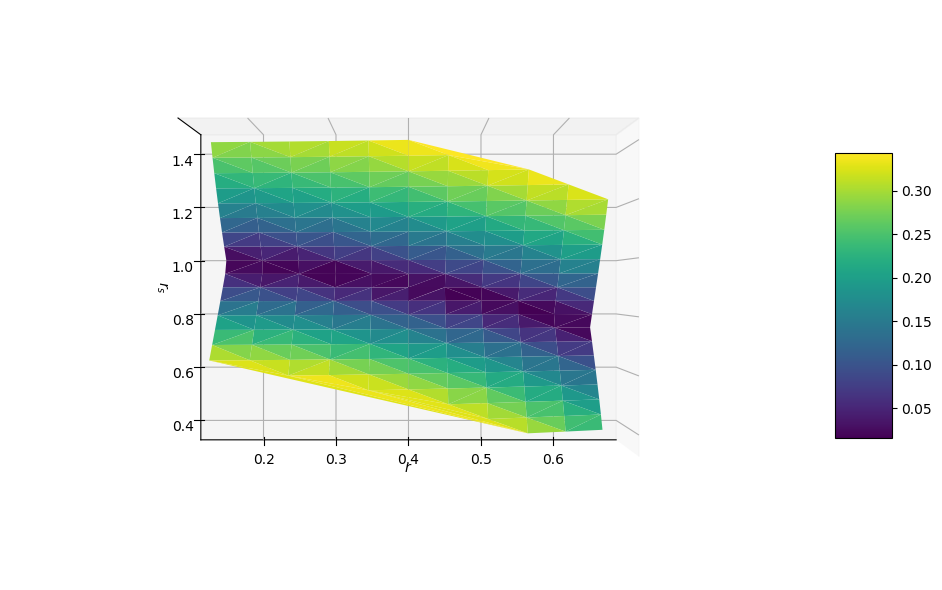

In [537]:
# Make the plot
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(lim_rrange, lim_r_srange, lim_erange, cmap=plt.cm.viridis, linewidth=0.2, \
                       alpha=1)
ax.set_xlabel('$r$')
ax.set_ylabel('$r_s$')
ax.set_zticks([])
# ax.set_zlabel('St Dev Error')

# ax.view_init(30, 300)
ax.view_init(89.9999, 269.9999)

# ax.view_init(90, 90)
fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.scatter(0.5, 0.9, -1, color='red', s=20)
plt.tight_layout()
plt.savefig(figures_file + 'parameters_top' + figures_param, dpi=300)
plt.show()

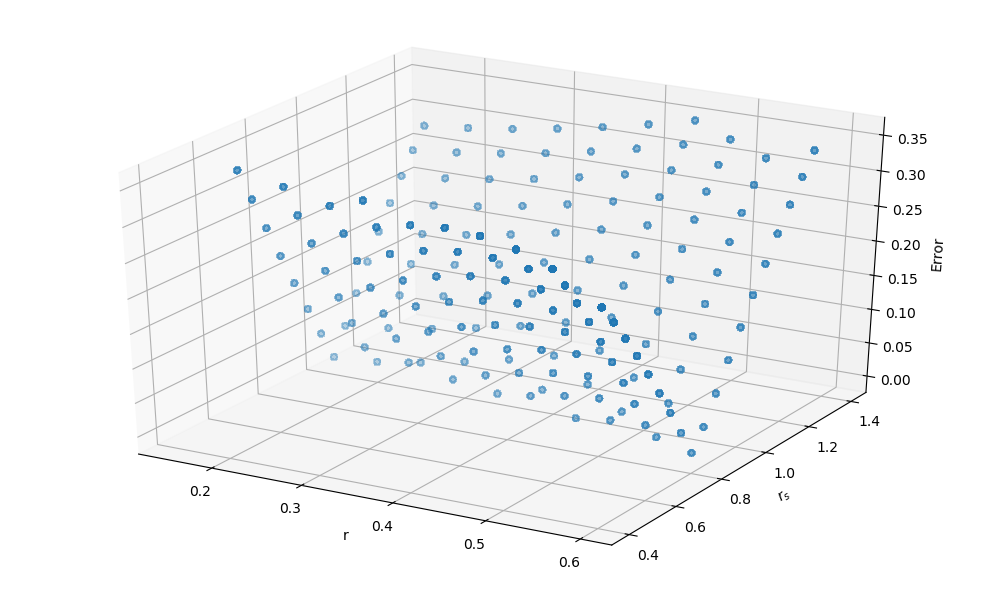

In [302]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

surf = ax.scatter(lim_rrange, lim_r_srange, lim_erange, antialiased=False)
ax.set_xlabel('r')
ax.set_ylabel('$r_s$')
ax.set_zlabel('Error')
# ax.set_zlim(0,0.4)

# ax.view_init(0, 90)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

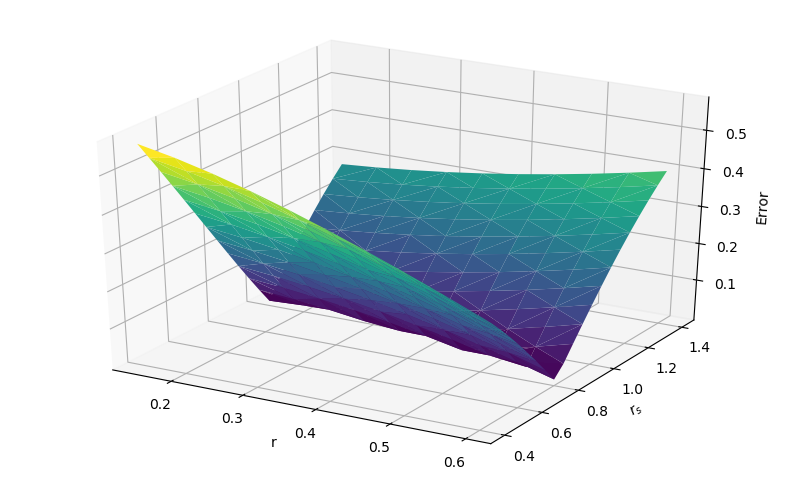

In [267]:
# Make the plot
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(rrange, r_srange, erange, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('r')
ax.set_ylabel('$r_s$')
ax.set_zlabel('Error')

# Rotate it
# ax.view_init(20, -130)
plt.show()




In [222]:
X_r = np.arange(0.15, 0.65, 0.05)
Y_r_s = np.arange(0.4, 1.45, 0.05)

In [244]:
def get_mins(x_r, y_r_s):
    m_r_s_list = list()
    for r in x_r:
        m = float('inf')
        for r_s in y_r_s:
            sd = find_sd(ratios, round(r, 6), round(r_s, 6))
            e = abs(sd - 1)
            if e < m:
                m = e
                m_r_s = r_s
        m_r_s_list.append(round(m_r_s, 6))
        
    return m_r_s_list

In [248]:
min_r_s = get_mins(X_r, Y_r_s)

In [253]:
for i in range(len(min_r_s)):
    print(round(X_r[i], 6), '\t', min_r_s[i])

0.15 	 1.0
0.2 	 1.0
0.25 	 1.0
0.3 	 0.95
0.35 	 0.95
0.4 	 0.95
0.45 	 0.9
0.5 	 0.85
0.55 	 0.85
0.6 	 0.8


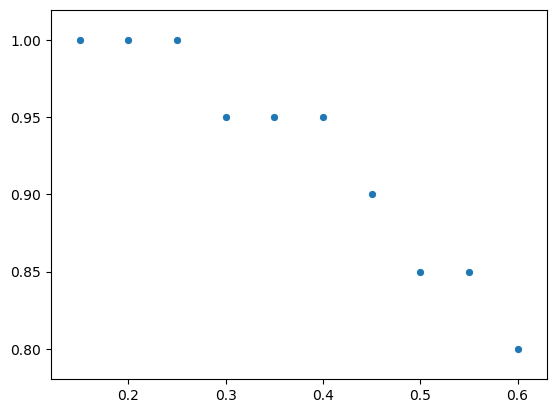

In [261]:
import seaborn as sns
plt.style.use('default')
sns.scatterplot(X_r, min_r_s)

In [303]:
# ratios

In [239]:
find_sd(ratios, 0.6, 0.55)

0.808116810313964

In [86]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)


In [91]:
X

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [92]:
X, Y = np.meshgrid(X, Y)

In [95]:
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])

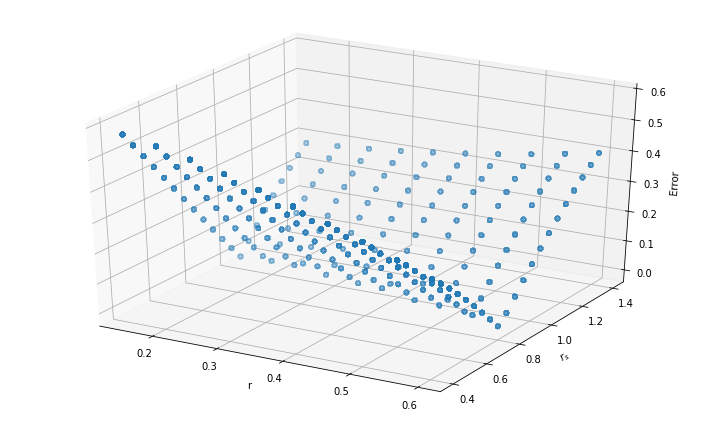

In [163]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

surf = ax.scatter(rrange, r_srange, erange, antialiased=False)
ax.set_xlabel('r')
ax.set_ylabel('$r_s$')
ax.set_zlabel('Error')
# ax.set_zlim(0,0.4)

# ax.view_init(0, 90)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

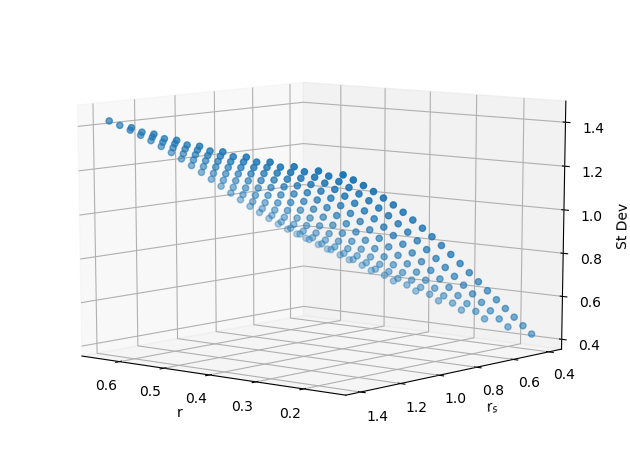

In [467]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rrange, r_srange, sdrange)
ax.set_xlabel('r')
ax.set_ylabel('$r_s$')
ax.set_zlabel('St Dev')
# ax.set_zlim(0,0.4)

ax.view_init(10, 130)
plt.tight_layout()
plt.axhline(y=0.5, lw=20)
plt.show()

In [ ]:
def find_sd(ratios, r, r_s):
    for i in range(len(ratios)):
        if ratios[i][0] == [r, r_s]:
            return ratios[i][1]